In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../data/raw/student_performance.csv')

In [3]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [5]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.048400,75.356076,70.701924,69.546552,74.956320,74.836214,49.963720,74.78305,71.652097,17.521140,5.507200,6.514420
std,1.989786,14.392716,17.436325,17.108996,14.404287,14.423848,28.989785,14.54243,7.230097,7.193035,2.886662,1.446155
min,18.000000,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,50.602000,5.000000,1.000000,4.000000
25%,19.000000,62.945000,55.707500,54.697500,62.340000,62.357500,25.075000,61.97000,66.533875,11.500000,3.000000,5.300000
50%,21.000000,75.670000,70.860000,69.485000,75.090000,74.905000,49.600000,74.54000,71.696250,17.400000,6.000000,6.500000
75%,23.000000,87.862500,85.760000,83.922500,87.352500,87.292500,75.500000,87.63000,76.711625,23.700000,8.000000,7.800000
max,24.000000,100.000000,99.990000,99.980000,99.990000,99.990000,100.000000,100.00000,95.091500,30.000000,10.000000,9.000000


In [6]:
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

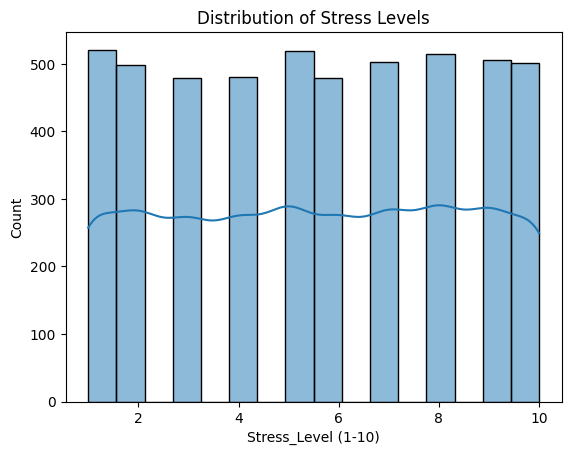

In [7]:
sns.histplot(df['Stress_Level (1-10)'], kde=True)
plt.title('Distribution of Stress Levels')
plt.show()

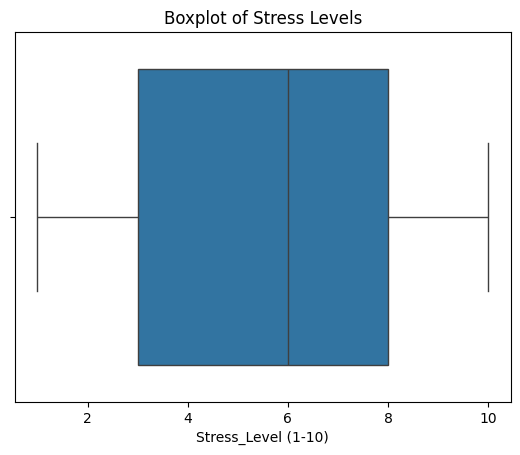

In [8]:
sns.boxplot(x=df['Stress_Level (1-10)'])
plt.title('Boxplot of Stress Levels')
plt.show()

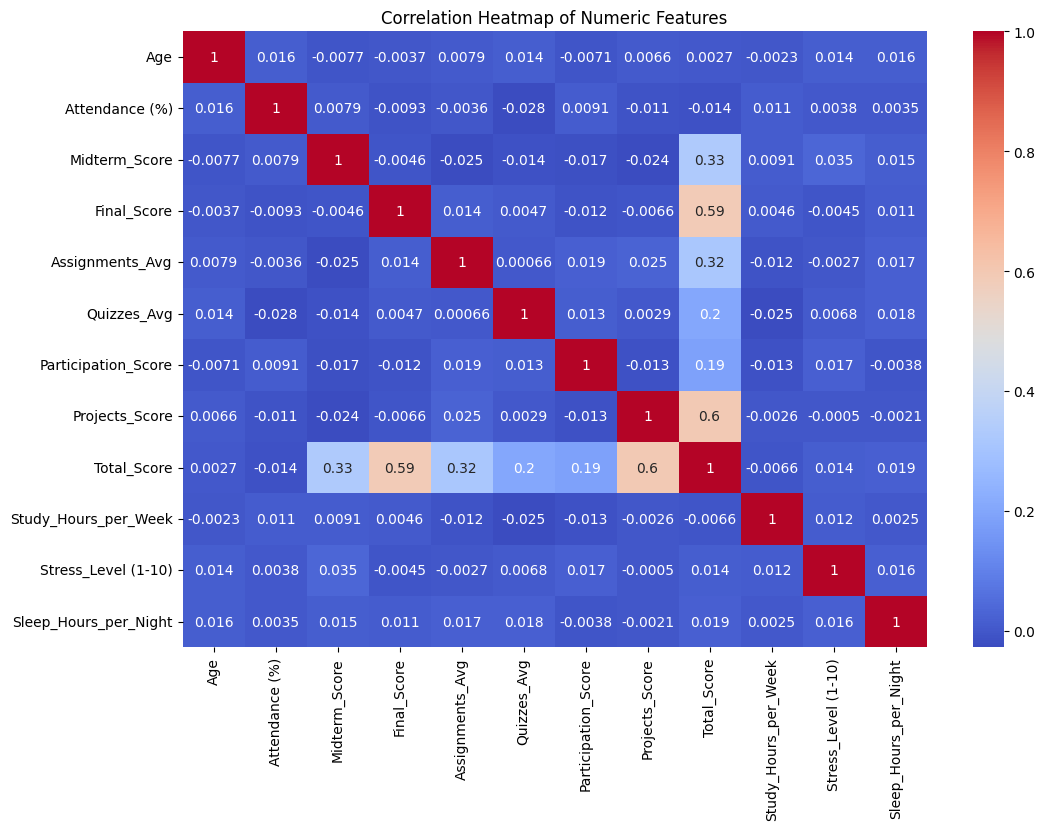

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [10]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                            Age  Attendance (%)  Midterm_Score  Final_Score  \
Age                    1.000000        0.015936      -0.007710    -0.003700   
Attendance (%)         0.015936        1.000000       0.007881    -0.009300   
Midterm_Score         -0.007710        0.007881       1.000000    -0.004638   
Final_Score           -0.003700       -0.009300      -0.004638     1.000000   
Assignments_Avg        0.007902       -0.003600      -0.025153     0.013635   
Quizzes_Avg            0.013998       -0.027840      -0.013974     0.004714   
Participation_Score   -0.007132        0.009051      -0.017434    -0.011764   
Projects_Score         0.006628       -0.011101      -0.024138    -0.006563   
Total_Score            0.002746       -0.014165       0.330636     0.588608   
Study_Hours_per_Week  -0.002313        0.011200       0.009096     0.004645   
Stress_Level (1-10)    0.013800        0.003838       0.035220    -0.004479   
Sleep_Hours_per_Night  0.015510        0.003493     

In [11]:
total_rows = df.shape[0]
missing_rows = df['Parent_Education_Level'].isnull().sum()
missing_percentage = (missing_rows / total_rows) * 100

print(f"Missing rows : {missing_rows} ({missing_percentage:.2f}%)")

Missing rows : 1025 (20.50%)


In [12]:
df['Parent_Education_Level'].fillna('Unknown', inplace=True)

/tmp/ipykernel_8545/4128101565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parent_Education_Level'].fillna('Unknown', inplace=True)


In [13]:
duplicated_rows = df[df.duplicated()]
print(f"Duplicated Rows: {duplicated_rows.shape[0]}")

Duplicated Rows: 0


In [14]:
df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'], inplace=True)

In [15]:
categorical_columns = [
    'Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home',
    'Parent_Education_Level', 'Family_Income_Level'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

In [16]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [17]:
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

In [18]:
df_encoded.to_csv('../data/processed/preprocessed_data.csv', index=False)